In [43]:
import numpy as np
import PCMAPS_class as pcmaps
import healpy as hp

from numpy import sin, cos

In [44]:
def unit_vec(theta, phi):
    return np.array([sin(theta)*cos(phi),sin(theta)*sin(phi),cos(theta)] )

In [49]:
REARTH = 6378137.0
CLIGHT = 3.e8

N_freqs   = 500
nside_in  = 16
npix_in   = hp.nside2npix(nside_in)
freqs     = np.linspace(100,150,N_freqs)


''' geometric response '''

Resp_H1     = pcmaps.Detector(nside_in, 'H1')
F_term_H1 = np.array([Resp_H1.get_Fplus(), Resp_H1.get_Fcross()])# Pol, pix


''' exp factor '''

theta, phi = hp.pix2ang(nside_in,np.arange(hp.nside2npix(nside_in)))

position_vec    = Resp_H1._vec
momentum_norms  = freqs/CLIGHT
momentum_uvecs  = unit_vec(theta,phi).T

exp_argument = np.einsum('p, f -> pf' , np.dot(momentum_uvecs, position_vec), momentum_norms)
exp_term_H1  = np.ones((npix_in, N_freqs))#np.exp(-2.j * np.pi * exp_argument)


pol_resp_H1 = np.einsum('pf, Pp -> fPp', exp_term_H1, F_term_H1)
A_P_H1      = np.einsum('fPp -> fP', pol_resp_H1)/npix_in  

/Users/pai/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


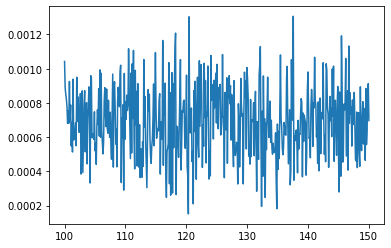

In [52]:
hp_amplitudes = np.sqrt(np.array([np.random.normal(10., 3., N_freqs), np.random.normal(10., 3., N_freqs)]))
hp_phase      = np.array([np.exp(1.j*2*np.pi*np.random.rand(N_freqs)),np.exp(1.j*2*np.pi*np.random.rand(N_freqs))])
hp_fourier_terms = hp_amplitudes * hp_phase

spectral_shape = np.ones(len(freqs)) # for now

h_freq_H1 = spectral_shape * np.einsum('Pf, fP -> f', hp_fourier_terms, A_P_H1)

plt.plot(freqs, h_freq_H1*np.conj(h_freq_H1))
plt.show()


/Users/pai/miniconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


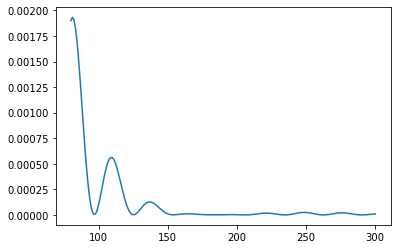